In [82]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
from matplotlib.colors import ListedColormap
import time

# for splitting data into training and testing
from sklearn.model_selection import train_test_split

# standardize features removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# multilayer perceptron classifier
from sklearn.neural_network import MLPClassifier

# K nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# Support vector machine, C-support vector classifier
from sklearn.svm import SVC

# Gaussian process classifier
from sklearn.gaussian_process import GaussianProcessClassifier

# radial basis function kernel (squared exponential kernel)
from sklearn.gaussian_process.kernels import RBF

# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Ensemble classifiers: Random forest and AdaBoost
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# Quadratic Discriminant Analysis classifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics

In [84]:
# Reading the data
# df = pd.read_csv('la2_rankIIIonly_extended.csv')
df = pd.read_csv('csv/la2_50matchs.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118292 entries, 0 to 118291
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   gameId                       118292 non-null  int64 
 1   region                       118292 non-null  object
 2   summonerName                 118292 non-null  object
 3   tier                         118292 non-null  object
 4   rank                         118292 non-null  object
 5   tierRank                     118292 non-null  object
 6   wins                         118292 non-null  int64 
 7   losses                       118292 non-null  int64 
 8   win                          118292 non-null  bool  
 9   lane                         118292 non-null  object
 10  role                         118292 non-null  object
 11  championId                   118292 non-null  int64 
 12  spell1Id                     118292 non-null  int64 
 13  spell2Id      

In [85]:
# Review missing data
print(df.isnull().sum())

gameId                         0
region                         0
summonerName                   0
tier                           0
rank                           0
tierRank                       0
wins                           0
losses                         0
win                            0
lane                           0
role                           0
championId                     0
spell1Id                       0
spell2Id                       0
kills                          0
deaths                         0
assists                        0
largestKillingSpree            0
largestMultiKill               0
killingSprees                  0
longestTimeSpentLiving         0
doubleKills                    0
tripleKills                    0
quadraKills                    0
pentaKills                     0
totalDamageDealt               0
totalDamageDealtToChampions    0
totalHeal                      0
totalUnitsHealed               0
damageDealtToObjectives        0
timeCCingO

In [86]:
# Eliminate rows with missing values
df.dropna(inplace=True)

In [87]:
X = df.drop(['tier', 'rank', 'tierRank', 'region', 'summonerName', 'lane', 'role'], axis=1).values
X_columns = df.drop(['tier', 'rank', 'tierRank', 'region', 'summonerName', 'lane', 'role'], axis=1).columns
y = df[['tier']].to_numpy().ravel()

In [88]:
# encoding categorical data e.g. tier as a dummy variable
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:,1] = labelencoder_X.fit_transform(X[:,1])

# encoding categorical data e.g. tier as a dummy variable
y,class_names = pd.factorize(y)

In [89]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 42)

In [91]:
names = [
            # "Nearest Neighbors",
            # "SVM Linear",
            # "SVM rbf",
            # "GP",
            "Decision Tree",
            "Random Forest",
            # "Neural Net", 
            "AdaBoost",
            # "Naive Bayes",
            "QDA"
        ]        
        
classifiers = [
    # KNeighborsClassifier(500),
    # SVC(kernel="linear", C=0.03, probability = True),
    # SVC(gamma=1.5, C=1, probability = True),
    # GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(criterion='gini', max_depth=27, random_state=3),
    RandomForestClassifier(criterion='gini', max_depth=27, n_estimators=100, random_state=3),
    # MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    # GaussianNB(),
    QuadraticDiscriminantAnalysis()
    ]

In [92]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

Decision Tree
Confusion Matrix: 
 [[4573  213   88   45   34    1]
 [ 181 4480  111   61   74   12]
 [  93   84 4557   55   60   28]
 [  43   64   75 4696   40   44]
 [  34   84   67   44 4669   39]
 [   0   14   29   54   34 4793]]
              precision    recall  f1-score   support

        IRON       0.93      0.92      0.93      4954
      BRONZE       0.91      0.91      0.91      4919
      SILVER       0.92      0.93      0.93      4877
        GOLD       0.95      0.95      0.95      4962
    PLATINUM       0.95      0.95      0.95      4937
     DIAMOND       0.97      0.97      0.97      4924

    accuracy                           0.94     29573
   macro avg       0.94      0.94      0.94     29573
weighted avg       0.94      0.94      0.94     29573



IndexError: tuple index out of range

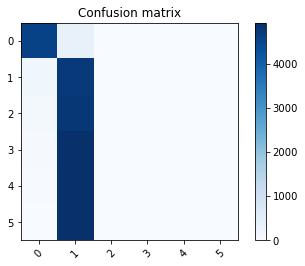

In [93]:
i=1
# plt.figure(figsize=(20,4))
for name, clf in zip(names, classifiers):
        # ax = plt.subplot(1 , len(classifiers) + 1, i)
        
        print(name)
        # start = time.time()
        # fit the model using the training set
        clf.fit(X_train, y_train)
        # end = time.time()
        # compute the mean accuracy of the classifier
        # score = clf.score(X_test, y_test)
        # end2 = time.time()
        # compute ROC curve
        # y_test_pred = clf.predict_proba(X_test)[:, 1]

        y_pred=clf.predict(X_test)

        # Classification results on test set
        # accuracy = metrics.accuracy_score(y_test, y_pred)
        # print("Accuracy: {:.2f}".format(accuracy))

        cm=confusion_matrix(y_test,y_pred)
        print('Confusion Matrix: \n', cm)
        print(classification_report(y_test, y_pred, target_names=class_names))

        # print(name,str(end-start),str(end2 - end))

        i += 1

In [ ]:
# # Visualize the tree by graphiz
# import graphviz
# from sklearn import tree
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Users/matia/anaconda3/Library/bin/graphviz/'
# feature_names = X_columns
# dot_data = tree.export_graphviz(classifier, out_file=None, filled=True, rounded = True, feature_names=feature_names, class_names=class_names)
# graph = graphviz.Source(dot_data)
# graph

In [ ]:
# i=1
# plt.figure(figsize=(20,4))
# for name, clf in zip(names, classifiers):
#         ax = plt.subplot(1 , len(classifiers) + 1, i)
        

#         start = time.time()
#         # fit the model using the training set
#         clf.fit(X_train, y_train)
#         end = time.time()
#         # compute the mean accuracy of the classifier
#         score = clf.score(X_test, y_test)
#         end2 = time.time()
#         compute ROC curve
#         y_test_pred = clf.predict_proba(X_test)[:, 1]
#         fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred, pos_label=1)
#         auc = metrics.roc_auc_score(y_test, y_test_pred, multi_class='ovo')
#         acc = metrics.accuracy_score(y_test, y_test_pred >= 0.5, multi_class='ovo')
#         f1 = metrics.f1_score(y_test, y_test_pred >= 0.5, multi_class='ovo')
#         ax.set_xlim(-.05, 1.05)
#         ax.set_ylim(-.05, 1.05)
#         ax.set_xticks(())
#         ax.set_yticks(())
#         ax.text(0.95, 0.3, "Acc: %.2f" % acc, ha = 'right')
#         ax.text(0.95, 0.2, "F1-score: %.2f" % f1, ha = 'right')
#         ax.text(0.95, 0.1, "AUC: %.2f" % auc, ha = 'right')
#         ax.plot(fpr, tpr, lw = 5)
#         idx = np.argmin(np.abs(thresholds - 0.5))
#         ax.scatter(fpr[idx], tpr[idx], marker = 'o', c = 'r')
#         print(name,str(end-start),str(end2 - end))
#         counter 
#         i += 1